# Visualizing Well Log Data with Python 3

A brief example of how to use common Python data science tools to explore well log data.



In [1]:
import urllib.request
import lasio
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

In [2]:
%matplotlib notebook

We can pull the LAS file directly from the University Lands ftp server.

In [3]:
url = "ftp://publicftp.utlands.utsystem.edu/ScannedLogs/235_Irion/34785/4223534785_UNIV_43_18_1H_TOPHOLE.las"
with urllib.request.urlopen(url) as uf:
    raw = uf.read().decode("utf-8")
las_f = lasio.las.LASFile(raw)
df = las_f.df()

Add a column to our dataframe, which is equal to the maximum lithography percent observed at that depth.

We'll use this as a (very) rough estimate of how homogenous the current strata is.

In [4]:
df = df.assign(MAXPERC=df.loc[:,["SHALE", "SAND", "DOLO", "LIME", "CALCIM"]].max(axis=1))

In [5]:
df.head()

,Vdepth,ROP_FPH,TGAS,C1,C2,C3,C4I,C4N,CALCIM,SAND,SHALE,DOLO,LIME,MAXPERC
Depth,,,,,,,,,,,,,,
805.0,805.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,5.0,80.0,20.0,0.0,0.0,80.0
806.0,806.0,27.1,4.0,NaN,NaN,NaN,NaN,NaN,5.0,80.0,20.0,0.0,0.0,80.0
807.0,807.0,59.6,5.0,NaN,NaN,NaN,NaN,NaN,5.0,80.0,20.0,0.0,0.0,80.0
808.0,808.0,60.9,6.0,0.155,0.0,0.0,0.0,0.0,5.0,80.0,20.0,0.0,0.0,80.0
809.0,809.0,62.2,6.0,0.160,0.0,0.0,0.0,0.0,5.0,80.0,20.0,0.0,0.0,80.0


A quick plot of ROP, lithography percentages and total gas.

<IPython.core.display.Javascript object>


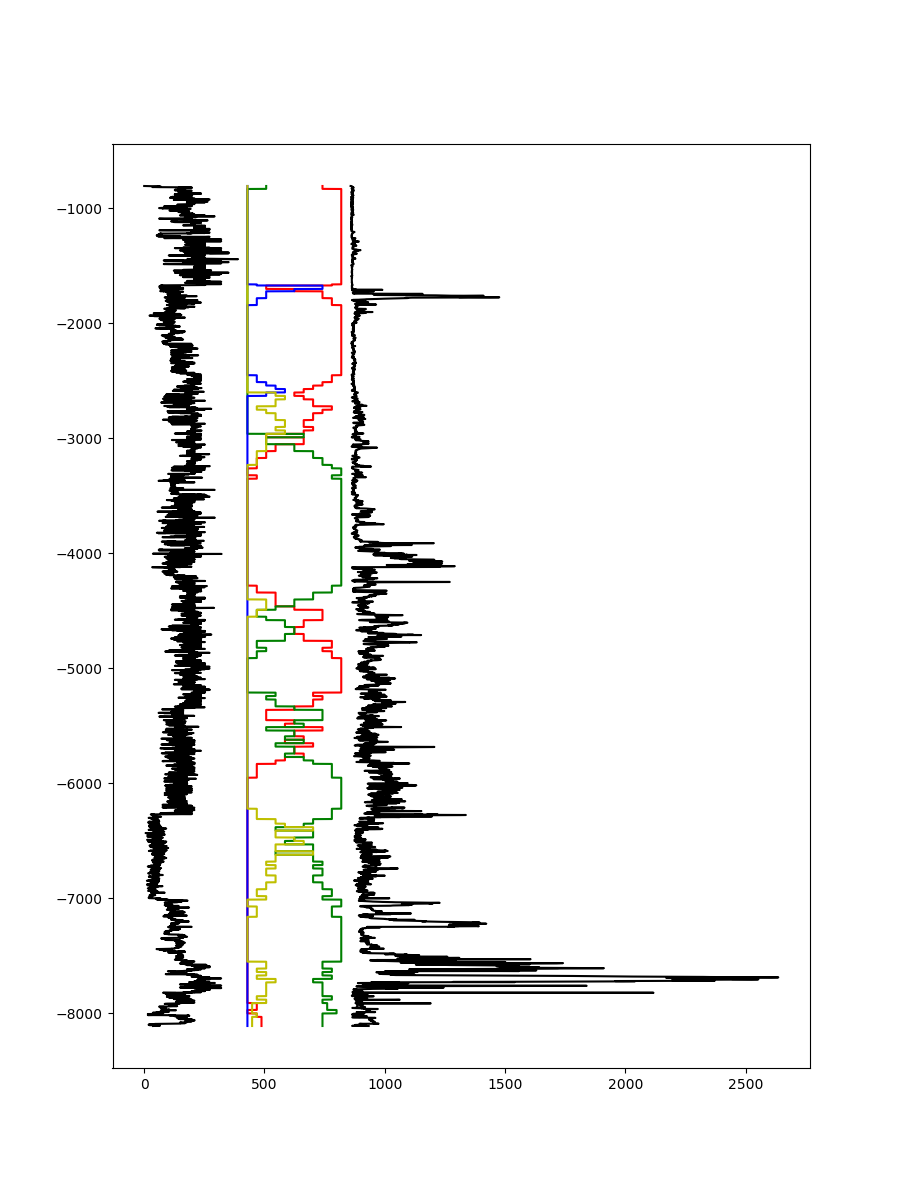

In [6]:
plt.figure(1, figsize=(9, 12))
max_rop = df.ROP_FPH.max()
c_sand = (max_rop * (df.SAND.values / 100.0)) + (1.1 * max_rop)
c_shale = (max_rop * (df.SHALE.values / 100.0)) + (1.1 * max_rop)
c_dolo = (max_rop * (df.DOLO.values / 100.0)) + (1.1 * max_rop)
c_lime = (max_rop * (df.LIME.values / 100.0)) + (1.1 * max_rop)
c_tgas = df.TGAS.values + (2 * (1.1 * max_rop))



plt.plot(df.ROP_FPH.values, -1 * df.Vdepth.values, "k-")
plt.plot(c_sand, -1 * df.Vdepth.values, "r-")
plt.plot(c_shale, -1 * df.Vdepth.values, "g-")
plt.plot(c_dolo, -1 * df.Vdepth.values, "b-")
plt.plot(c_lime, -1 * df.Vdepth.values, "y-")
plt.plot(c_tgas, -1 * df.Vdepth.values, "k-")



Look for correlations.  Each of these tests is significant:
* Shale negatively impacts ROP
* Sand positively impacts ROP
* More gas is seen when the lithography is "more heterogenous"

In [7]:
print(scipy.stats.pearsonr(df.ROP_FPH.values, df.SHALE))
print(scipy.stats.pearsonr(df.ROP_FPH.values, df.SAND))
print(scipy.stats.pearsonr(df.TGAS.values, df.MAXPERC.values))


(-0.22742368803943064, 2.4104102383805212e-86)
(0.32318022285026982, 3.1646651811473452e-177)
(-0.036216437943556154, 0.0019609007098495041)
